# Scope

## Questions to answer

Data Analysis to resolve sobre questions for Food S.A. abour cheese production and commercializing. 

### Was a good decision to commercialize cheese in 2020? Which cheese brands are the most important? 

### Which channel/plant is critical for the company? Does its importance depend from brand?

### The company wants to launch a new cheese brand, but it doesn’t know if launch it with products of 100 gr per unit or 200 gr. Which one do you recommend? And how many tons of product do you recommend producing for the first month of sales of this new product?

### How many tons of product do you recommend produce for the next 3 months for all portfolio? [Create an Excel’s dashboard to visualize history and next 3 months forecast]

# Data Analysis

In [108]:
import pandas as pd

### Uploading Datasets

In [270]:
df_transaction = pd.read_csv('Transactions.txt', sep='|')
df_transaction.drop(['Unnamed: 0', 'Unnamed: 7'], axis = 1, inplace=True)
df_transaction.drop(0, axis = 0, inplace=True)
df_transaction.reset_index(drop = True, inplace=True)
df_transaction.rename({'MATERIAL          ' : 'MATERIAL', 'KG                  ' : 'KG', 'SOLD_TO   ': 'SOLD_TO'}, axis=1, inplace=True)
df_transaction['PERIOD'] = df_transaction['PERIOD'].apply(str)
df_transaction['PERIOD'] = pd.to_datetime(df_transaction['PERIOD'], format='%Y%m')
df_transaction['KG'] = df_transaction['KG'].astype('float')
df_transaction['MATERIAL'] = df_transaction['MATERIAL'].astype('str')
#df_transaction['YEAR'] = df_transaction['PERIOD'].str.slice(stop=4)
#df_transaction['MONTH'] = df_transaction['PERIOD'].str.slice(start=4)
df_transaction.head()

/tmp/ipykernel_19992/4265098315.py:1: DtypeWarning: Columns (2,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_transaction = pd.read_csv('Transactions.txt', sep='|')


,UNIT_OF_WT,MATERIAL,SOLD_TO,PLANT,PERIOD,KG
0,KG,000076222105783800,PL5888V005,5888,2020-01-01,9.071
1,KG,000076222017708000,PL5877V002,5877,2021-02-01,3.570
2,KG,000076222107865200,PL5884V902,5884,2021-01-01,0.734
3,KG,000076222105819301,0156054042,5842,2021-06-01,570.240
4,KG,000076222105835900,PL5869V021,5869,2020-07-01,11.000


In [110]:
df_clients = pd.read_csv('Master of Clients.csv', sep=',')
df_clients.head()

,CHANNEL,SOLD_TO
0,CS OTHERS,100028281
1,LKA,156059545
2,GKA,100112354
3,RETAILCAPS,100044920
4,RETAILCAPS,100052885


In [111]:
df_products = pd.read_excel('Master Product.xlsx')
df_products.head()

,MATERIAL,CODE_TO_GROUP,SUB_BRAND,BRAND,CATEGORY,TYPE,WEIGHT_PER_UNIT
0,76223008294500,XX0553,SUBBRAND1,BRAND1,CHEESE,REGULAR,150
1,75010026122100,XX0526,SUBBRAND2,BRAND2,CHEESE,REGULAR,235
2,76223006408800,OLD1136,SUBBRAND10,BRAND5,DESSERTS,REGULAR,40
3,76222106163000,XX0608,SUBBRAND10,BRAND5,DESSERTS,REGULAR,35
4,76222102659900,XX0537,SUBBRAND4,BRAND1,CHEESE,REGULAR,90


### Checking for Statitical Issues

In [112]:
def First_check (df):

    print('Check for Null Numbers:')
    
    for i in df.columns:
        if df[i].isnull().sum() != 0:
            print(i)
        else:
            print('There aren´t null numbers at', i)
    print('***************')

    print('Check for Dataset Size:')
    print(df.shape)

    print('***************')
    print('Check for Data Type:')
    df.info()
    pass

In [113]:
First_check(df_transaction)

Check for Null Numbers:
There aren´t null numbers at UNIT_OF_WT
There aren´t null numbers at MATERIAL
There aren´t null numbers at SOLD_TO
There aren´t null numbers at PLANT
There aren´t null numbers at PERIOD
There aren´t null numbers at KG
***************
Check for Dataset Size:
(3752752, 6)
***************
Check for Data Type:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3752752 entries, 0 to 3752751
Data columns (total 6 columns):
 #   Column      Dtype         
---  ------      -----         
 0   UNIT_OF_WT  object        
 1   MATERIAL    object        
 2   SOLD_TO     object        
 3   PLANT       object        
 4   PERIOD      datetime64[ns]
 5   KG          float64       
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 171.8+ MB


In [114]:
First_check(df_clients)

Check for Null Numbers:
There aren´t null numbers at CHANNEL
There aren´t null numbers at SOLD_TO
***************
Check for Dataset Size:
(47343, 2)
***************
Check for Data Type:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47343 entries, 0 to 47342
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   CHANNEL  47343 non-null  object
 1   SOLD_TO  47343 non-null  object
dtypes: object(2)
memory usage: 739.9+ KB


In [115]:
First_check(df_products)

Check for Null Numbers:
There aren´t null numbers at MATERIAL
There aren´t null numbers at CODE_TO_GROUP
There aren´t null numbers at SUB_BRAND
There aren´t null numbers at BRAND
There aren´t null numbers at CATEGORY
There aren´t null numbers at TYPE
There aren´t null numbers at WEIGHT_PER_UNIT
***************
Check for Dataset Size:
(286, 7)
***************
Check for Data Type:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   MATERIAL         286 non-null    int64 
 1   CODE_TO_GROUP    286 non-null    object
 2   SUB_BRAND        286 non-null    object
 3   BRAND            286 non-null    object
 4   CATEGORY         286 non-null    object
 5   TYPE             286 non-null    object
 6   WEIGHT_PER_UNIT  286 non-null    int64 
dtypes: int64(2), object(5)
memory usage: 15.8+ KB


# Scope Analysis:

### Was a good decision to commercialize cheese in 2020? Which cheese brands are the most important? 

In [132]:
# There are CHEESE and CHESE. I assumed that both are about Cheese.

df_products['CATEGORY'].unique()

array(['CHEESE', 'DESSERTS', 'DRESSINGS', 'INGREDIENTS', 'CHESE',
       'DRESSING'], dtype=object)

In [133]:
# All IDs from Cheese were searched by 'CHE':

id_cheese = df_products[df_products['CATEGORY'].str.contains('CHE')]['MATERIAL']

In [134]:
# Dataset from Cheese Transactions:

df_cheese = df_transaction[df_transaction['MATERIAL'].isin(id_cheese)].reset_index(drop=True)
df_not_cheese = df_transaction[~df_transaction['MATERIAL'].isin(id_cheese)].reset_index(drop=True)

In [135]:
df_cheese

,UNIT_OF_WT,MATERIAL,SOLD_TO,PLANT,PERIOD,KG
0,KG,76222108888900,0156054942,5843,2020-05-01,934.08
1,KG,76222109691002,0100118122,5817,2020-11-01,208.00
2,KG,75010026152201,0100116554,5817,2021-03-01,5130.00
3,KG,75010026121100,0100032131,5845,2020-10-01,-11.28
4,KG,76222105615200,0156062602,5845,2021-02-01,24.00
...,...,...,...,...,...,...
14553,KG,76222105586400,0156055817,5842,2020-10-01,25.20
14554,KG,76223008294500,0100027680,5842,2020-08-01,36.00
14555,KG,76222102884300,0156060496,5842,2020-04-01,4.32
14556,KG,76222105622100,0100068150,5817,2021-02-01,32508.00


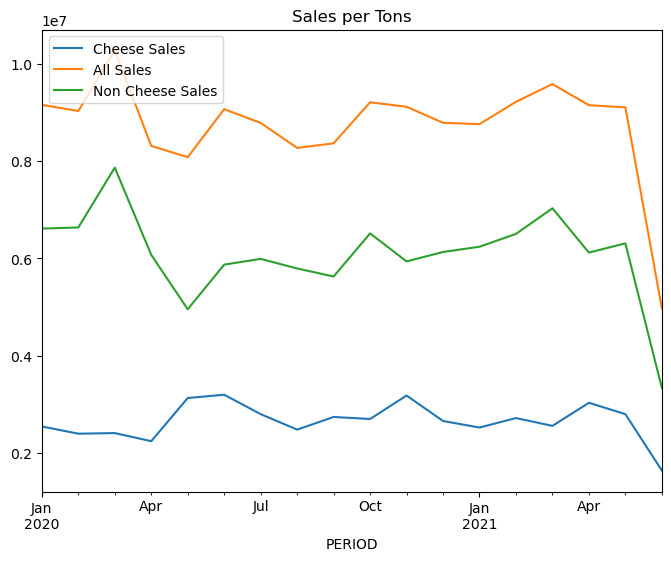

In [317]:
# Comparing tons of sales:

cheese_monthly = df_cheese.groupby('PERIOD')['KG'].sum()
all_monthly = df_transaction.groupby('PERIOD')['KG'].sum()
not_monthly = df_not_cheese.groupby('PERIOD')['KG'].sum()

ax = cheese_monthly.plot(title='Sales per Tons', label = 'Cheese Sales', figsize=(8,6))
ax = all_monthly.plot(label = 'All Sales')
ax = not_monthly.plot(label = 'Non Cheese Sales')
ax.legend()

In [326]:
df = cheese_monthly.to_frame()
df = df.reset_index()
df.rename({'KG' : 'KG_Cheese'}, axis=1, inplace=True)

aux = all_monthly.to_frame()
aux = aux.reset_index()
df['KG_Total'] = aux['KG']

df['%'] = ((df['KG_Cheese'] / df['KG_Total']) * 100).round(2)
df

,PERIOD,KG_Cheese,KG_Total,%
0,2020-01-01,2543086.395,9.154702e+06,27.78
1,2020-02-01,2394483.697,9.028336e+06,26.52
2,2020-03-01,2407063.750,1.027172e+07,23.43
3,2020-04-01,2240119.177,8.310603e+06,26.95
4,2020-05-01,3127449.133,8.079617e+06,38.71
5,2020-06-01,3195421.360,9.065744e+06,35.25
6,2020-07-01,2796283.849,8.784034e+06,31.83
7,2020-08-01,2478369.971,8.269346e+06,29.97
8,2020-09-01,2738179.019,8.363847e+06,32.74
9,2020-10-01,2696210.194,9.207810e+06,29.28


In [137]:
# Comparing Number of Different Customers:

cheese_monthly = len(df_cheese['SOLD_TO'].unique())
all_monthly = len(df_transaction['SOLD_TO'].unique())
not_monthly = len(df_not_cheese['SOLD_TO'].unique())

print('All Customers:', all_monthly)
print('Customers that Bought Cheese:', cheese_monthly)
print('Customers that Bought Rest:', not_monthly)

All Customers: 8104
Customers that Bought Cheese: 339
Customers that Bought Rest: 8057


In [138]:
# Comparing Amount of Sales:

cheese_monthly = len(df_cheese)
all_monthly = len(df_transaction)
not_monthly = len(df_not_cheese)

print('All Customers:', all_monthly)
print('Customers that Bought Cheese:', cheese_monthly)
print('Customers that Bought Rest:', not_monthly)

All Customers: 3752752
Customers that Bought Cheese: 14558
Customers that Bought Rest: 3738194


In [139]:
df_cheese.groupby('PERIOD')['KG'].sum() / len(df_cheese['SOLD_TO'].unique())

PERIOD
2020-01-01    7501.729779
2020-02-01    7063.373737
2020-03-01    7100.483038
2020-04-01    6608.021171
2020-05-01    9225.513667
2020-06-01    9426.021711
2020-07-01    8248.624923
2020-08-01    7310.825873
2020-09-01    8077.224245
2020-10-01    7953.422401
2020-11-01    9377.443378
2020-12-01    7832.478643
2021-01-01    7436.350091
2021-02-01    8010.170395
2021-03-01    7537.072522
2021-04-01    8938.433324
2021-05-01    8248.602900
2021-06-01    4829.346959
Name: KG, dtype: float64

In [315]:
# Comparing KG / Amount of Customers:


cheese_monthly = df_cheese.groupby('PERIOD')['KG'].sum() / len(df_cheese.groupby('PERIOD')['SOLD_TO'].unique())
all_monthly = df_transaction.groupby('PERIOD')['KG'].sum() / len(df_transaction.groupby('PERIOD')['SOLD_TO'].unique())
not_monthly = df_not_cheese.groupby('PERIOD')['KG'].sum() / len(df_not_cheese.groupby('PERIOD')['SOLD_TO'].unique())

ax = cheese_monthly.plot(title='Sales per Tons / Amount of Customers', label = 'Cheese Sales', figsize=(12,8))
ax = all_monthly.plot(label = 'All Sales')
ax = not_monthly.plot(label = 'Non Cheese Sales')
ax.legend()

TypeError: 'int' object is not callable

In [141]:
cheese_analysis = df_products.merge(df_cheese)
cheese_analysis.groupby(['BRAND'])['KG'].sum()

BRAND
BRAND1    6.774780e+07
BRAND2    7.385708e+05
BRAND3    1.836929e+06
Name: KG, dtype: float64

### Which channel/plant is critical for the company? Does its importance depend from brand?

In [329]:
df_channel = df_transaction.merge(df_products)
df_channel.groupby(['PLANT'])['KG'].sum().sort_values(ascending=False)[:5]

ValueError: You are trying to merge on object and int64 columns. If you wish to proceed you should use pd.concat

In [143]:
df_channel.groupby(['PLANT', 'BRAND'])['KG'].sum().sort_values(ascending=False)[:25]

PLANT  BRAND 
5817   BRAND1    5.642870e+07
5843   BRAND1    5.713877e+06
5842   BRAND7    4.918104e+06
       BRAND1    3.396852e+06
5841   BRAND8    1.613822e+06
5817   BRAND3    1.196910e+06
5841   BRAND5    1.187368e+06
5817   BRAND1    1.093781e+06
5841   BRAND7    9.953714e+05
5845   BRAND1    8.267957e+05
5841   BRAND6    8.120149e+05
       BRAND2    4.544873e+05
5842   BRAND5    4.295963e+05
5843   BRAND3    3.324522e+05
5841   BRAND4    3.015748e+05
5842   BRAND3    2.091053e+05
5817   BRAND7    1.980376e+05
5843   BRAND1    1.556243e+05
5817   BRAND2    1.514595e+05
5842   BRAND6    1.400100e+05
       BRAND8    1.037736e+05
5842   BRAND1    9.013644e+04
5842   BRAND2    8.238696e+04
5845   BRAND3    6.611357e+04
5842   BRAND7    6.442857e+04
Name: KG, dtype: float64

### The company wants to launch a new cheese brand, but it doesn’t know if launch it with products of 100 gr per unit or 200 gr. Which one do you recommend? And how many tons of product do you recommend producing for the first month of sales of this new product?

In [144]:
df_cheese

,UNIT_OF_WT,MATERIAL,SOLD_TO,PLANT,PERIOD,KG
0,KG,76222108888900,0156054942,5843,2020-05-01,934.08
1,KG,76222109691002,0100118122,5817,2020-11-01,208.00
2,KG,75010026152201,0100116554,5817,2021-03-01,5130.00
3,KG,75010026121100,0100032131,5845,2020-10-01,-11.28
4,KG,76222105615200,0156062602,5845,2021-02-01,24.00
...,...,...,...,...,...,...
14553,KG,76222105586400,0156055817,5842,2020-10-01,25.20
14554,KG,76223008294500,0100027680,5842,2020-08-01,36.00
14555,KG,76222102884300,0156060496,5842,2020-04-01,4.32
14556,KG,76222105622100,0100068150,5817,2021-02-01,32508.00


In [145]:
first_month = df_cheese

aux = first_month.groupby(['MATERIAL', 'PERIOD'])['KG'].sum()
aux = aux.to_frame()
aux = aux.reset_index()
aux

,MATERIAL,PERIOD,KG
0,75010020004500,2020-01-01,34.77
1,75010020004500,2020-03-01,1.90
2,75010026120100,2020-01-01,7221.72
3,75010026120100,2020-02-01,8636.52
4,75010026120100,2020-03-01,15486.00
...,...,...,...
534,76223008294500,2020-06-01,51598.35
535,76223008294500,2020-07-01,50289.45
536,76223008294500,2020-08-01,15357.15
537,76223008294500,2020-09-01,140.85


In [146]:
first_month = aux['MATERIAL'].unique()

x = []
for i in aux['MATERIAL'].unique():
    x.append(aux[aux['MATERIAL'] == i].reset_index().iloc[0])


first_month = pd.DataFrame(x)
first_month.head()

,index,MATERIAL,PERIOD,KG
0,0,75010020004500,2020-01-01,34.77
0,2,75010026120100,2020-01-01,7221.72
0,20,75010026120101,2020-09-01,967.68
0,30,75010026121100,2020-01-01,13699.56
0,41,75010026121101,2020-09-01,445.56


In [147]:
x = []
for i in aux['MATERIAL'].unique():
    x.append(df_products[df_products['MATERIAL'] == i].reset_index().iloc[0])


x = pd.DataFrame(x)
x.head()

,index,MATERIAL,CODE_TO_GROUP,SUB_BRAND,BRAND,CATEGORY,TYPE,WEIGHT_PER_UNIT
0,65,75010020004500,XX0531,SUBBRAND4,BRAND1,CHEESE,REGULAR,190
0,86,75010026120100,XX0523,SUBBRAND2,BRAND2,CHEESE,REGULAR,120
0,146,75010026120101,XX0523,SUBBRAND2,BRAND2,CHEESE,REGULAR,120
0,251,75010026121100,XX0525,SUBBRAND2,BRAND2,CHEESE,REGULAR,235
0,263,75010026121101,XX0525,SUBBRAND2,BRAND2,CHEESE,REGULAR,235


In [148]:
result = pd.concat([first_month, x], axis=1)
result.head()

,index,MATERIAL,PERIOD,KG,index,MATERIAL,CODE_TO_GROUP,SUB_BRAND,BRAND,CATEGORY,TYPE,WEIGHT_PER_UNIT
0,0,75010020004500,2020-01-01,34.77,65,75010020004500,XX0531,SUBBRAND4,BRAND1,CHEESE,REGULAR,190
0,2,75010026120100,2020-01-01,7221.72,86,75010026120100,XX0523,SUBBRAND2,BRAND2,CHEESE,REGULAR,120
0,20,75010026120101,2020-09-01,967.68,146,75010026120101,XX0523,SUBBRAND2,BRAND2,CHEESE,REGULAR,120
0,30,75010026121100,2020-01-01,13699.56,251,75010026121100,XX0525,SUBBRAND2,BRAND2,CHEESE,REGULAR,235
0,41,75010026121101,2020-09-01,445.56,263,75010026121101,XX0525,SUBBRAND2,BRAND2,CHEESE,REGULAR,235


In [149]:
result.groupby('WEIGHT_PER_UNIT')['KG'].sum()[[150, 200]]

WEIGHT_PER_UNIT
150     58048.5
200    259795.2
Name: KG, dtype: float64

In [150]:
result[result['WEIGHT_PER_UNIT'] == 200][['MATERIAL', 'KG', 'BRAND']]

,MATERIAL,MATERIAL,KG,BRAND
0,76222105615200,76222105615200,48456.0,BRAND1
0,76222105615201,76222105615201,211339.2,BRAND1


In [151]:
print(result[result['WEIGHT_PER_UNIT'] == 200]['KG'].mean())
print(result[result['WEIGHT_PER_UNIT'] == 200]['KG'].median())
print(result[result['WEIGHT_PER_UNIT'] == 200]['KG'].mode())

129897.6
129897.6
0     48456.0
1    211339.2
Name: KG, dtype: float64


### How many tons of product do you recommend produce for the next 3 months for all portfolio? [Create an Excel’s dashboard to visualize history and next 3 months forecast]

In [271]:
# Bibliotecas de Treinamento
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import preprocessing

In [272]:
le = preprocessing.LabelEncoder()

df_transaction['MATERIAL ID'] = le.fit_transform(df_transaction['MATERIAL'])
df_transaction['PERIOD ID'] = le.fit_transform(df_transaction['PERIOD'])

In [273]:
periods = df_transaction['PERIOD'].sort_values().unique()

train = periods[:-3]
test = periods[-3:]

In [274]:
df_train = df_transaction[df_transaction['PERIOD'].isin(train)]
df_test = df_transaction[df_transaction['PERIOD'].isin(test)]

In [275]:
# Predictos:
predictors = ['MATERIAL ID', 'PERIOD ID']

# X and Y train/test:
x_train = df_train[predictors]
y_train = df_train['KG']

x_test = df_test[predictors]
y_test = df_test['KG']

In [283]:
# Random Forest Regression:
lm = RandomForestRegressor(n_estimators=100)
model = lm.fit(x_train, y_train)

y_pred = model.predict(x_test)

df_test['KG_RFR'] = y_pred

erroMedioAbs = mean_absolute_error(y_test, y_pred)
erroMedioQuad = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {erroMedioAbs:.2f}")
print(f"Mean Squared Error: {erroMedioQuad:.2f}")
print(f"R²: {r2:.2f}")

Mean Absolute Error: 59.34
Mean Squared Error: 752441.61
R²: 0.21


/tmp/ipykernel_19992/3519573132.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['KG_RFR'] = y_pred


### Another Approach

In [344]:
df_cheese = df_cheese.sort_values(['MATERIAL', 'PERIOD'])

In [361]:
ids = df_cheese[df_cheese['PERIOD'] == '2021/06/01']['MATERIAL']

#df_cheese = df_transaction[df_transaction['MATERIAL'].isin(id_cheese)].reset_index(drop=True)

df = df_cheese[df_cheese['MATERIAL'].isin(ids)].reset_index(drop=True)
df

,UNIT_OF_WT,MATERIAL,SOLD_TO,PLANT,PERIOD,KG
0,KG,75010026120100,PL5894V020,5894,2020-01-01,35.04
1,KG,75010026120100,0156054780,5841,2020-01-01,156.96
2,KG,75010026120100,PL5894V014,5894,2020-01-01,4.08
3,KG,75010026120100,PL5894V009,5894,2020-01-01,5.52
4,KG,75010026120100,0156052662,5843,2020-01-01,4.32
...,...,...,...,...,...,...
7457,KG,76222109691002,0100055449,5817,2021-06-01,3584.00
7458,KG,76222109691002,0100029384,5817,2021-06-01,1648.00
7459,KG,76222109691002,0100097487,5817,2021-06-01,2240.00
7460,KG,76222109691002,0100087235,5845,2021-06-01,4928.00


In [382]:
df = df.groupby(['MATERIAL', 'PERIOD'])['KG'].sum()

df = df.to_frame()
df = df.reset_index()

In [407]:
le = preprocessing.LabelEncoder()

df['MATERIAL ID'] = le.fit_transform(df['MATERIAL'])
df['PERIOD ID'] = le.fit_transform(df['PERIOD'])

periods = df['PERIOD'].sort_values().unique()
train = periods[:-3]
test = periods[-3:]

df_train = df[df['PERIOD'].isin(train)]
df_test = df[df['PERIOD'].isin(test)]


# Predictos:
predictors = ['MATERIAL ID', 'PERIOD ID']

# X and Y train/test:
x_train = df_train[predictors]
y_train = df_train['KG']

x_test = df_test[predictors]
y_test = df_test['KG']

In [389]:
# Random Forest Regression:
lm = RandomForestRegressor(n_estimators=100)
model = lm.fit(x_train, y_train)

y_pred = model.predict(x_test)

erroMedioAbs = mean_absolute_error(y_test, y_pred)
erroMedioQuad = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {erroMedioAbs:.2f}")
print(f"Mean Squared Error: {erroMedioQuad:.2f}")
print(f"R²: {r2:.2f}")

Mean Absolute Error: 60526.17
Mean Squared Error: 16617334540.79
R²: 0.41


In [403]:
df_test

,MATERIAL,PERIOD,KG,MATERIAL ID,PERIOD ID
15,75010026120100,2021-05-01,0.720,0,15
16,75010026120100,2021-06-01,0.240,0,16
17,75010026120100,2021-07-01,0.120,0,17
25,75010026120101,2021-05-01,14340.600,1,15
26,75010026120101,2021-06-01,13112.646,1,16
...,...,...,...,...,...
216,76222108934600,2021-06-01,131932.200,21,16
217,76222108934600,2021-07-01,86070.000,21,17
225,76222109691002,2021-05-01,121912.000,22,15
226,76222109691002,2021-06-01,146176.000,22,16


In [408]:
from dateutil.relativedelta import relativedelta
df_test['PERIOD'] = df_test['PERIOD'] + pd.offsets.DateOffset(months=3)

df_test

/tmp/ipykernel_19992/2250007916.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['PERIOD'] = df_test['PERIOD'] + pd.offsets.DateOffset(months=3)


,MATERIAL,PERIOD,KG,MATERIAL ID,PERIOD ID
15,75010026120100,2021-08-01,0.720,0,15
16,75010026120100,2021-09-01,0.240,0,16
17,75010026120100,2021-10-01,0.120,0,17
25,75010026120101,2021-08-01,14340.600,1,15
26,75010026120101,2021-09-01,13112.646,1,16
...,...,...,...,...,...
216,76222108934600,2021-09-01,131932.200,21,16
217,76222108934600,2021-10-01,86070.000,21,17
225,76222109691002,2021-08-01,121912.000,22,15
226,76222109691002,2021-09-01,146176.000,22,16


In [409]:
result = pd.concat([df, df_test])
result.drop(['MATERIAL ID', 'PERIOD ID'], axis =1, inplace=True)
result

,MATERIAL,PERIOD,KG
0,75010026120100,2020-02-01,7221.72
1,75010026120100,2020-03-01,8636.52
2,75010026120100,2020-04-01,15486.00
3,75010026120100,2020-05-01,12316.32
4,75010026120100,2020-06-01,9946.20
...,...,...,...
216,76222108934600,2021-09-01,131932.20
217,76222108934600,2021-10-01,86070.00
225,76222109691002,2021-08-01,121912.00
226,76222109691002,2021-09-01,146176.00


In [410]:
result['KG'] = result['KG'].round(2)

In [411]:
result.to_csv('Cheese_Production.csv', index=False)

In [298]:
df_transaction.to_csv('Transaction.csv', index=True)

In [311]:
df_test.to_csv('Prediction.csv', index=True)